# Simulación estocástica #

Es una simulación que permite seguir la evolución de variables que cambian aleatoriamente con ciertas probabilidades.

**Con un modelo estocastico** nosotros podemos crear una projeción que esta basada en un conjunto de valores aleatorios. Hacemos "realizar" una variables(s) aleatoria(s) y repetimos, repetimos, repetimos...

In [3]:
u <- runif(52)
caras <- ceiling(6*u)

In [5]:
caras

[1] 3 6 3 3 4 6 4 6 6 3 3 6 1 4 5 3 2 1 1 1 2 2 3 2 6 4 4 3 3 2 6 3 3 3 2 6 3 1
[39] 3 2 6 2 3 1 4 6 6 1 3 4 2 1

Vayamos por partes:
   + Entendamos la función **runif**:
   
    Al buscar y revisar la documentacion el comando *runif* se puede usar para simular $n$ variables aleatorias independientes uniformes. 
    

Por ejemplo, para generar 5 números aleatorios en el intervalo $[0,1]$ podemos hacer lo siguiente:

In [5]:
runif(5)

[1] 0.01076261 0.04519156 0.80728032 0.85486987 0.64323122

En orden para generar números uniformes en el intervalo de la forma $[a,b]$ podemos pasar a la función *runif* dos argumentos opcionales

In [8]:
runif(3, 1.2, 5.8)

[1] 5.639122 1.932558 4.079243

In [9]:
V <- runif(1000, 1, 5)

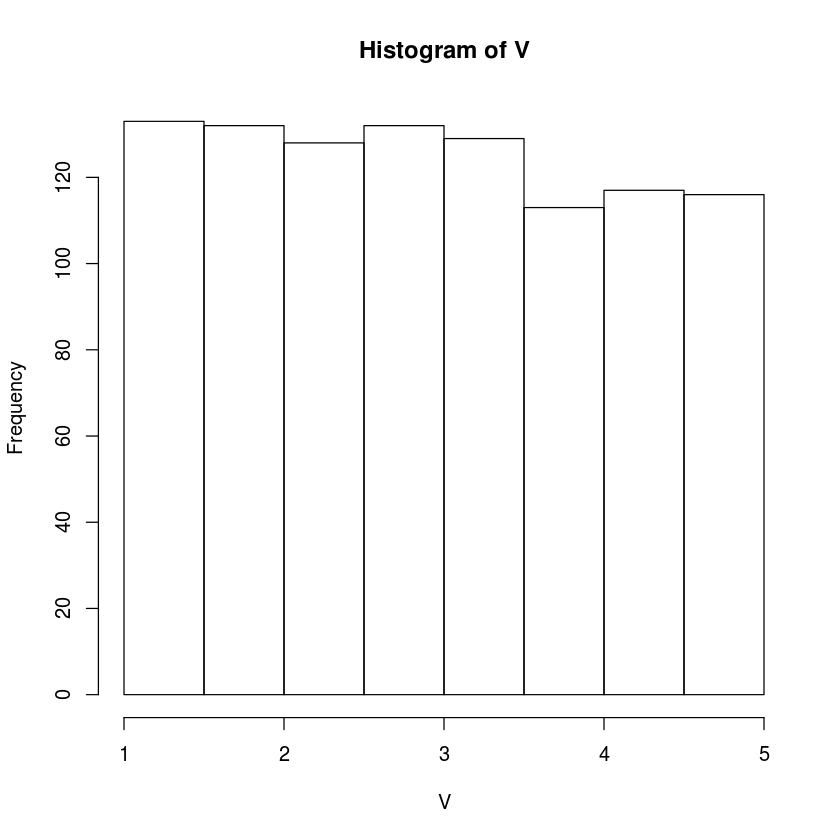

In [10]:
hist(V)

Observar que el histograma es solo un estimado de la función de probabilidad, acordar que la función de probabilidad de una variable aleatoria que esta distribuida de manera uniforme es:

$$ f(x) = \frac{1}{b-a} $$

para $ x \in [a,b] $ y $0$ en otra parte. Para esto vamos a ver la función dunif()

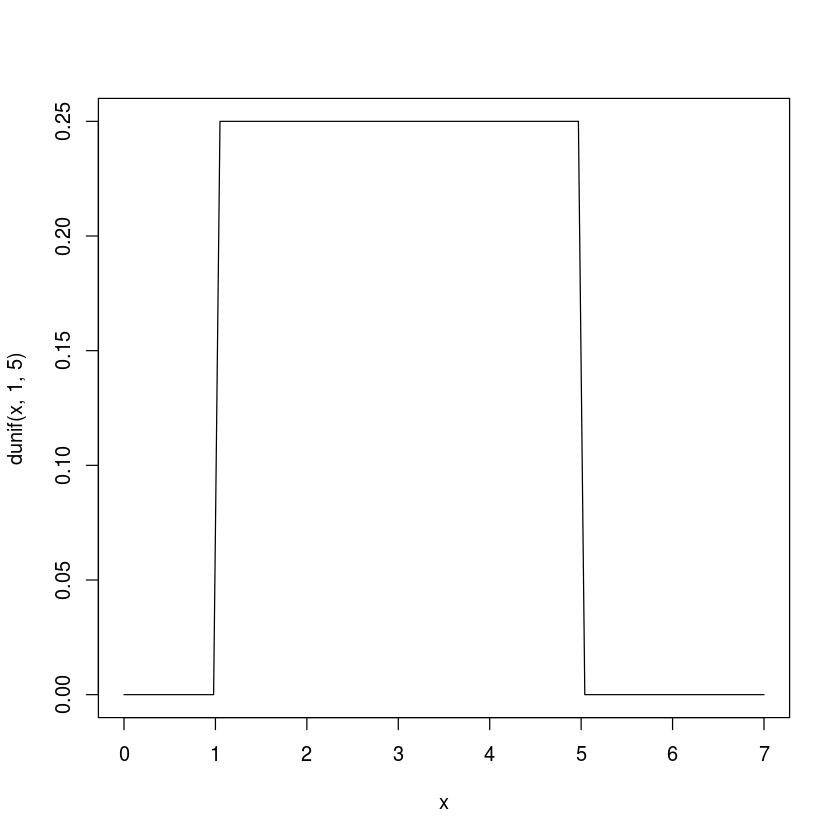

In [10]:
curve(dunif(x, 1, 5), from=0, to=7)

In [11]:
mean(V)

[1] 2.942333

In [12]:
sd(V)

[1] 1.177489

In [13]:
var(V)

[1] 1.386481

Demos entonces una interpretación al codigo ya hecho.

4 Explicar la siguiente función

In [15]:
sumdados<-function(n,M){
    sumas <- rep(0,M)
    for(b in 1:M){
        u <- runif(n)
        caras <- ceiling(6*u)
        sumas[b] <- sum(caras)
        }
    return(sumas)
    }

Tratemos de mirar que nos da esa función con varios valores de $n$ y $M$ diferentes.

In [15]:
sumdados(2,4)

[1] 7 8 6 9

Vamos entonces a observar cada una de las funciones nuevas: **REP** es replicar los valores en x. Observemos varios valores

In [16]:
rep(2,4)

[1] 2 2 2 2

In [17]:
rep(6,3)

[1] 6 6 6

Demos entonces una intepretación a la función sumdados...

El punto 5, nos dice entonces que ejecutemos la funcion sumdados con los datos $n=50$ y $M=100000$, hagamos un histograma y calculamos la esperanza, varianza, la densidad normal y otro histograma.

Vamos por partes

In [16]:
n <- 50
M <- 100000

In [17]:
sumas <- sumdados(n,M)

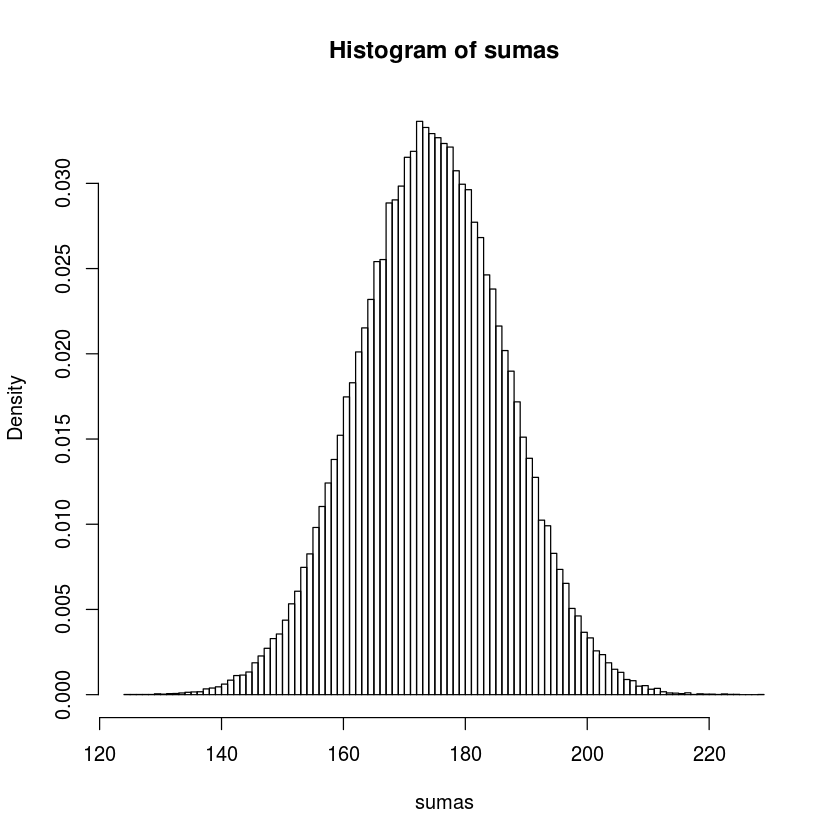

In [18]:
hist(sumas,breaks=100,freq=F)

Ahora, vamos por la segunda parte (despues del #)

Primero, observar

In [21]:
(1:8)

[1] 1 2 3 4 5 6 7 8

In [22]:
(1:6)*(1:6)

[1]  1  4  9 16 25 36

In [23]:
sum((1:6)*(1:6))

[1] 91

Calculamos primero la esperanza de un dado al cuadrado

$$ e2 = \sum_{i=1}^6 i^2 \cdot \frac{1}{6} $$

In [24]:
e2 <- sum((1:6)*(1:6))/6

In [25]:
e2

[1] 15.16667

Ahora, la varianza de un dado por

$$ s2 = e2-3.5 \cdot 3.5 $$

In [27]:
s2 <- e2-((3.5)*(3.5))

In [29]:
s2 = n*s2

Y ahora, tenemos, que vamos a redifinir:

$$ s2 = n \cdot s2, \quad s1 = \sqrt{s2} $$

In [32]:
s1 <- sqrt(s2)

In [33]:
s1

[1] 12.07615

In [34]:
s2

[1] 145.8333

Para la siguiente linea, debemos entender lo que hace la funcion **dnorm**, y observamos gracias a la documentación que este comando es para definir una funcion de distribucion normal donde **dnorm(x, varianza, desviacionmedia)**

In [35]:
y = dnorm(n:(6*n),mean=3.5*n,sd=s1)

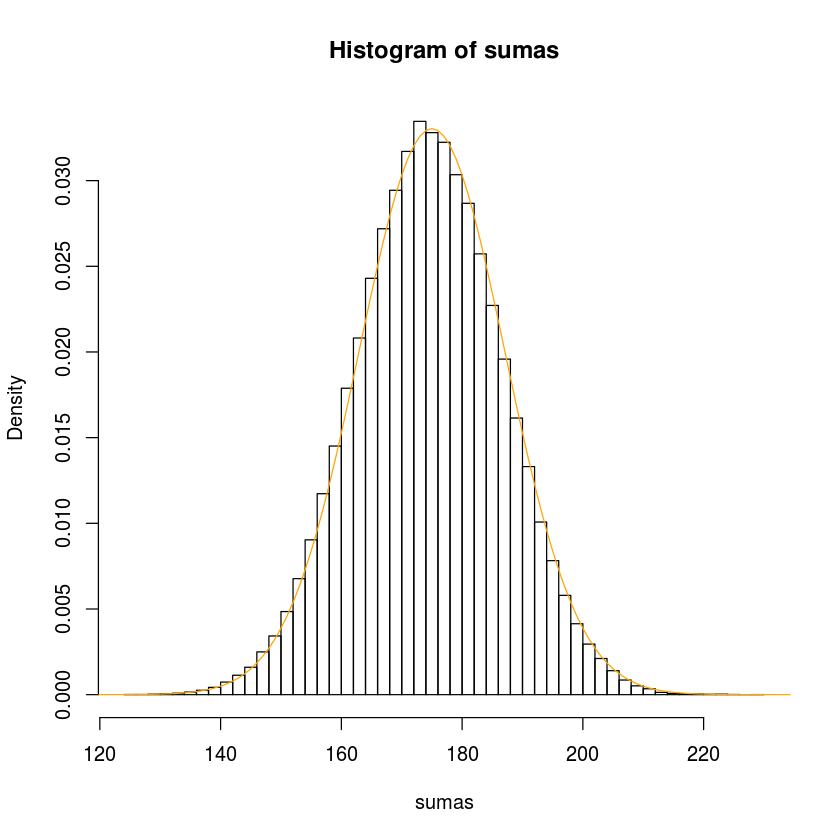

In [36]:
hist(sumas,freq=F,breaks=50)
lines(n:(6*n),y,col="orange")